<a href="https://colab.research.google.com/github/Mohit1-K/Customer-ad-click-prediction/blob/main/Customer_ad_click_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np

In [15]:
Df= pd.read_csv("/content/drive/MyDrive/Notebook work/advertising.csv")

In [16]:
Df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [17]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [18]:
print(len(Df["Country"].unique()))

237


In [19]:
data= Df.drop(columns= ["Country" , "City", "Ad Topic Line"]).copy()

In [20]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [21]:
import matplotlib.pyplot as plt

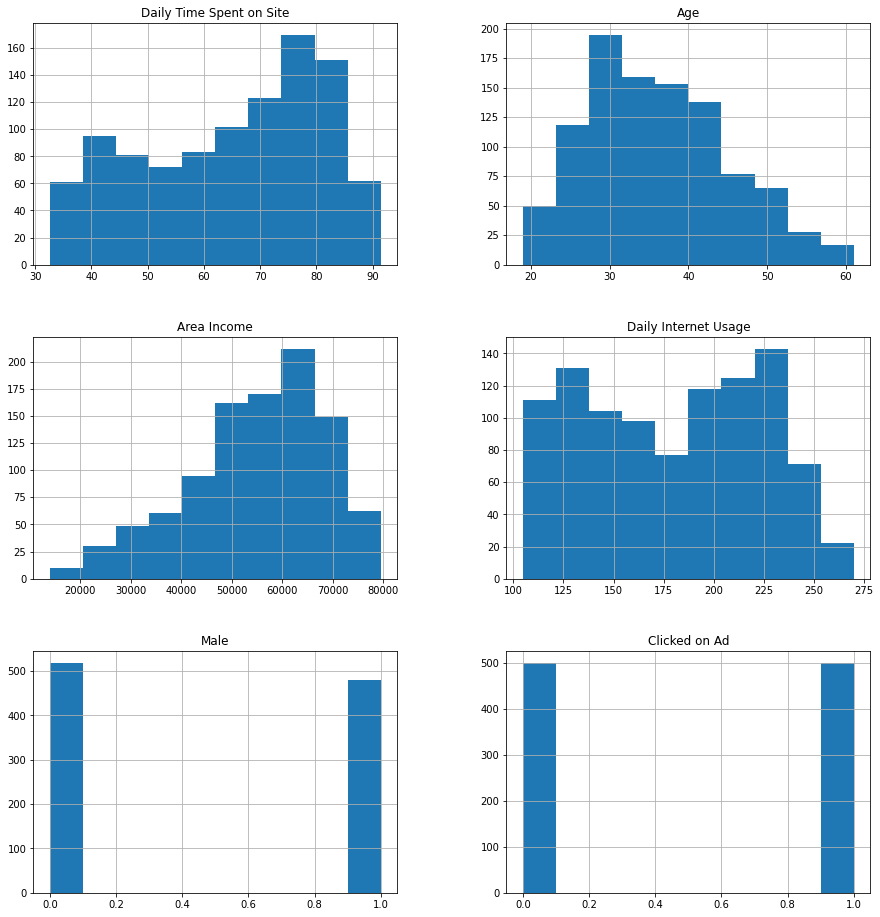

In [22]:
data.hist(figsize= (15,16))
plt.show()

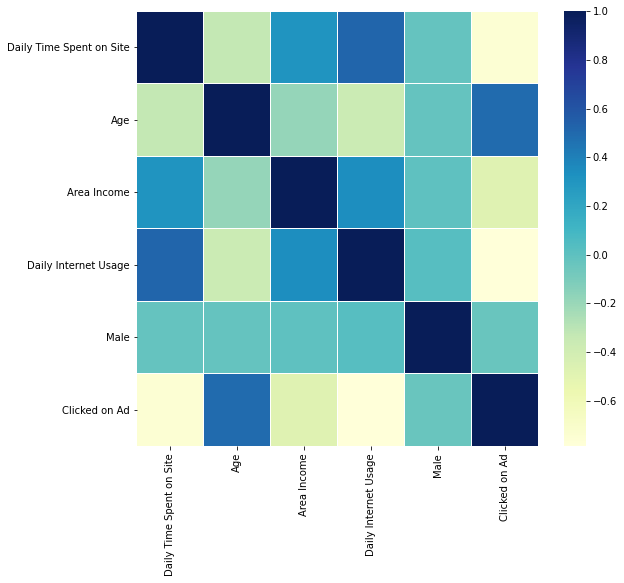

In [23]:
 
import seaborn as sns
corrmat = data.corr() 
 
  
 
f, ax = plt.subplots(figsize =(9, 8))
 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [24]:
data["Timestamp"]= pd.to_datetime(data["Timestamp"])

In [25]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [26]:
data["Hour"]= data["Timestamp"].dt.hour

In [27]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,Hour
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0,1
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0,20
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0,2
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0,3


In [28]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,11.660000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,6.960952
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,6.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,12.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,18.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,23.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Male                      1000 non-null   int64         
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   int64         
 7   Hour                      1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 62.6 KB


In [30]:
X= data.drop("Clicked on Ad", axis=1)

In [31]:
y= data["Clicked on Ad"]

In [32]:
X.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,11.660000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,6.960952
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,6.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,12.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,18.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,23.000000


In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [34]:
 
import datetime as dt
X['Timestamp']=X['Timestamp'].map(dt.datetime.toordinal)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Timestamp                 1000 non-null   int64  
 6   Hour                      1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [36]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [37]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.30)

In [38]:
from sklearn.svm import SVC
model= SVC()
from sklearn.linear_model import LogisticRegression
Le= LogisticRegression()

In [39]:
 
from sklearn.model_selection import RepeatedStratifiedKFold
 
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
 
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [40]:
print(grid_result.score(X_test, y_test))

0.9766666666666667


In [44]:
pred= np.array(grid_result.predict(X_test))

In [45]:
from sklearn.metrics import accuracy_score, classification_report

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       150
           1       0.99      0.96      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

